In [1]:
import pandas as pd
import sklearn

In [2]:
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering

In [3]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

df =pd.DataFrame(X,columns=iris.feature_names)
dfclass=pd.DataFrame(iris.target,columns=['class'])
df=pd.concat([df,dfclass],axis=1)

In [4]:
kclu=AgglomerativeClustering(n_clusters=3, linkage='ward')
#kclu=AgglomerativeClustering(n_clusters=3, affinity='manhattan',linkage='average')

In [5]:
kclu.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=3,
            pooling_func='deprecated')

In [6]:
kclu.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [7]:
dfcluster=pd.DataFrame(kclu.labels_,columns=['cluster'])
dfall=pd.concat([df,dfcluster],axis=1)
dfall.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


In [8]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.metrics import confusion_matrix
confusion_matrix(dfall['class'], dfall['cluster'])

array([[ 0, 50,  0],
       [49,  0,  1],
       [15,  0, 35]])

### Internal Cluster Validity Metrics

In [9]:
metrics.calinski_harabaz_score(X, dfall['cluster']) 

558.0580408128307

In [10]:
metrics.silhouette_score(X, dfall['cluster'], metric='euclidean')

0.5543236611296415

### External Cluster Validity Metrics

In [11]:
metrics.fowlkes_mallows_score(dfall['class'], dfall['cluster'])

0.8221697785442927

In [12]:
metrics.adjusted_rand_score(dfall['class'], dfall['cluster']) 

0.7311985567707745

In [13]:
metrics.mutual_info_score(dfall['class'], dfall['cluster'])  

0.8358251597124049

In [14]:
metrics.homogeneity_score(dfall['class'], dfall['cluster']) 

0.7608008469718723

In [15]:
metrics.completeness_score(dfall['class'], dfall['cluster']) 

0.7795958005591144

In [16]:
metrics.v_measure_score(dfall['class'], dfall['cluster'])    

0.7700836616487869

In [17]:
### Plot clusters in 2D

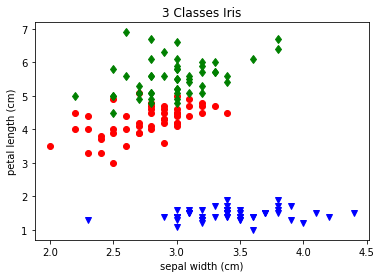

In [18]:
import matplotlib.pyplot as plt

df0=dfall[dfall['class']==0]
df1=dfall[dfall['class']==1]
df2=dfall[dfall['class']==2]

plt.plot(df0[iris.feature_names[1]],df0[iris.feature_names[2]],'bv')
plt.plot(df1[iris.feature_names[1]],df1[iris.feature_names[2]],'ro')
plt.plot(df2[iris.feature_names[1]],df2[iris.feature_names[2]],'gd')

plt.xlabel(iris.feature_names[1])
plt.ylabel(iris.feature_names[2])
plt.title('3 Classes Iris')
plt.show()

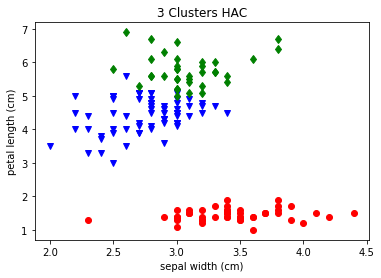

In [19]:
import matplotlib.pyplot as plt

df0=dfall[dfall['cluster']==0]
df1=dfall[dfall['cluster']==1]
df2=dfall[dfall['cluster']==2]

plt.plot(df0[iris.feature_names[1]],df0[iris.feature_names[2]],'bv')
plt.plot(df1[iris.feature_names[1]],df1[iris.feature_names[2]],'ro')
plt.plot(df2[iris.feature_names[1]],df2[iris.feature_names[2]],'gd')

plt.xlabel(iris.feature_names[1])
plt.ylabel(iris.feature_names[2])
plt.title('3 Clusters HAC')
plt.show()

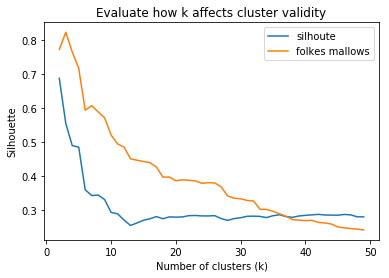

In [20]:
xs=range(2,50)
sils=[]
fms=[]

for i in xs:
    kclu=AgglomerativeClustering(n_clusters=i, linkage='ward')
    kclu.fit(X)
    sils.append(metrics.silhouette_score(X, kclu.labels_, metric='euclidean'))
    fms.append(metrics.fowlkes_mallows_score(dfall['class'], kclu.labels_))
plt.plot(xs,sils)
plt.plot(xs,fms)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette')
plt.title('Evaluate how k affects cluster validity')
plt.legend(['silhoute','folkes mallows'])
plt.show()